# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [2]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

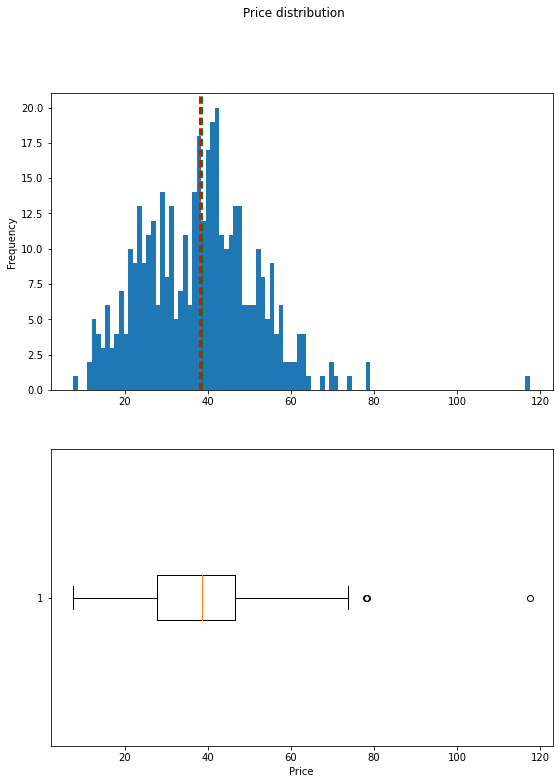

In [8]:
# get the label column
label = data['price_per_unit']

fig, ax = plt.subplots(2, 1, figsize=(9,12))

# plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# add lines for mean and median
ax[0].axvline(label.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='green', linestyle='dashed', linewidth=2)

# plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price')

# add the figure title
fig.suptitle('Price distribution')

fig.show()


In [11]:
features = data[['transaction_date', 'house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']]
label = data['price_per_unit']

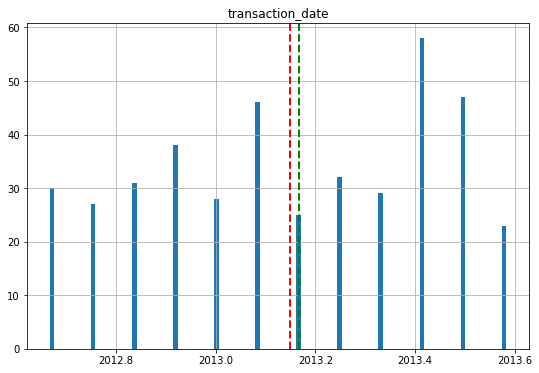

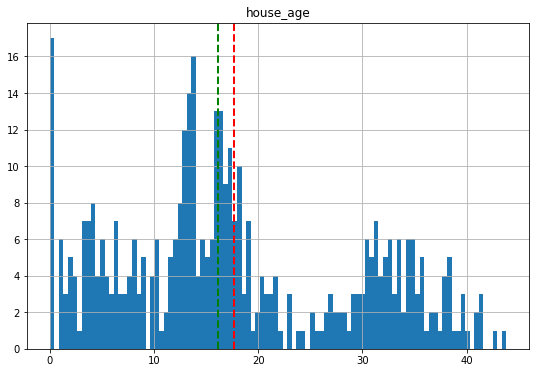

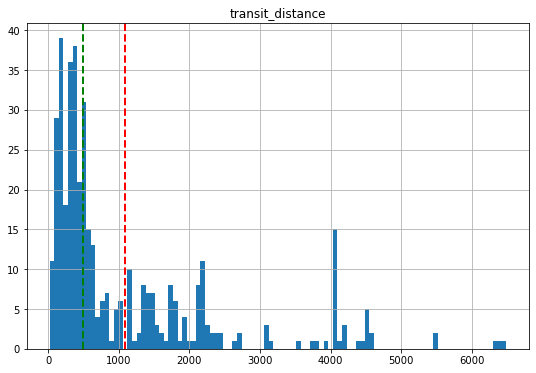

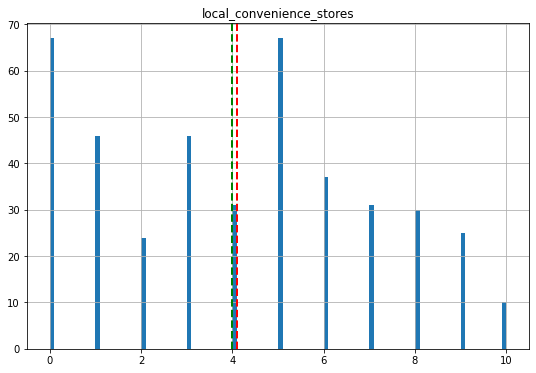

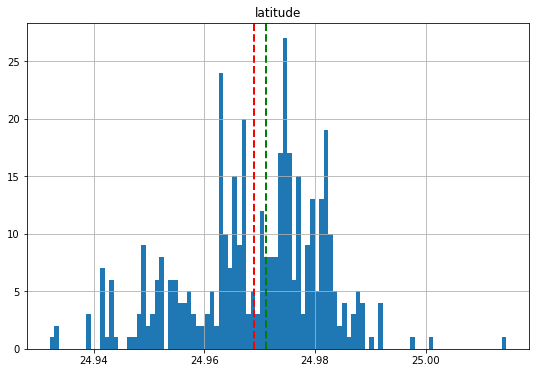

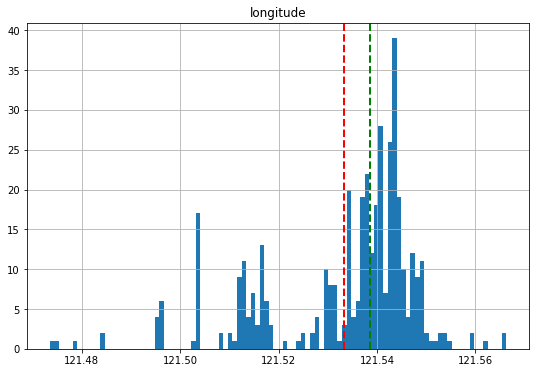

In [10]:
# plot a histogram for all features
for col in features:
    fig = plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature = features[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

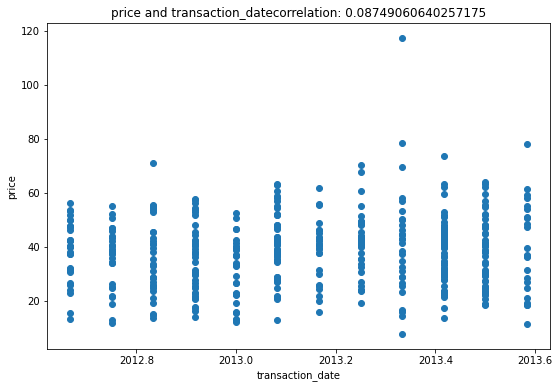

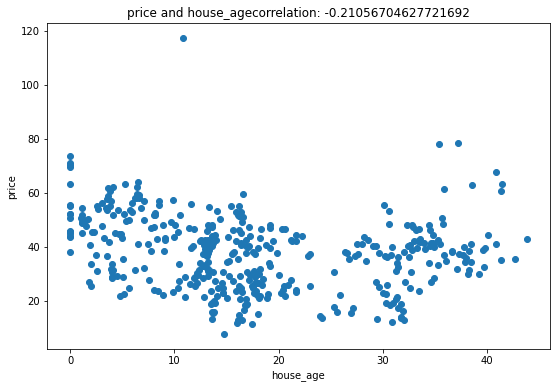

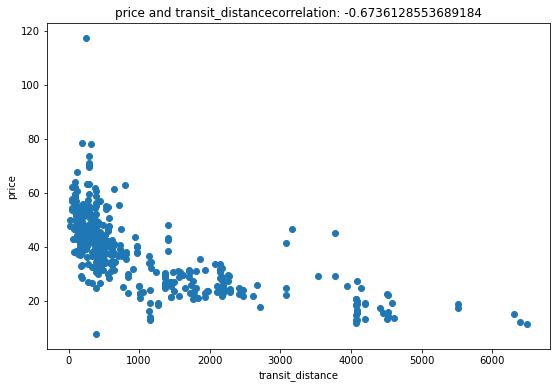

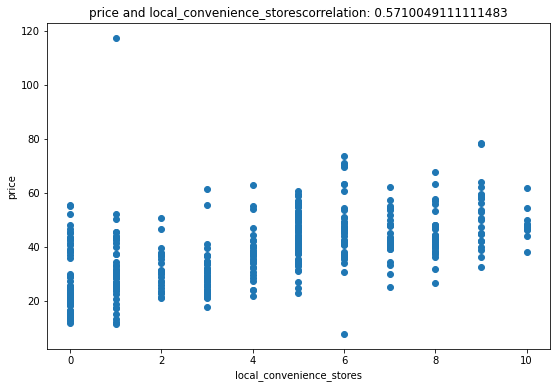

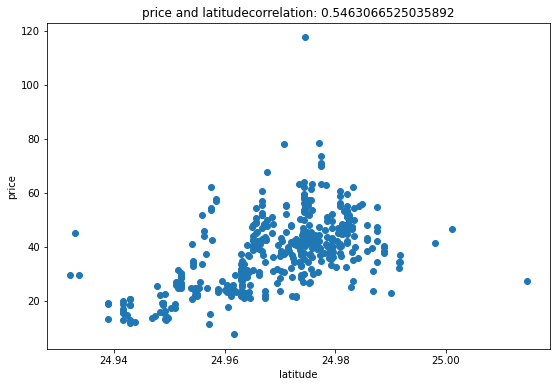

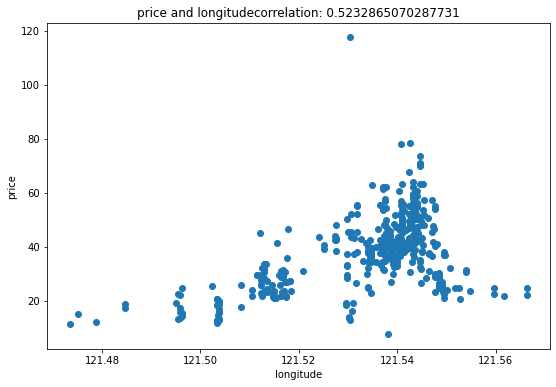

In [12]:
# count correlation
for col in features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = features[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('price')
    ax.set_title('price and ' + col + 'correlation: ' + str(correlation))

plt.show()

In [64]:
# remove outliers
data = data[data['price_per_unit']<70]

In [66]:
# separate features and labels
X, y = data[['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']].values, data['price_per_unit'].values

In [67]:
print('Features: ', X[:10], '\nlabels: ', y[:10], sep='\n')

Features: 
[[  32.        84.87882   10.        24.98298  121.54024]
 [  19.5      306.5947     9.        24.98034  121.53951]
 [  13.3      561.9845     5.        24.98746  121.54391]
 [  13.3      561.9845     5.        24.98746  121.54391]
 [   5.       390.5684     5.        24.97937  121.54245]
 [   7.1     2175.03       3.        24.96305  121.51254]
 [  34.5      623.4731     7.        24.97933  121.53642]
 [  20.3      287.6025     6.        24.98042  121.54228]
 [  31.7     5512.038      1.        24.95095  121.48458]
 [  17.9     1783.18       3.        24.96731  121.51486]]

labels: 
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [68]:
from sklearn.model_selection import train_test_split

# split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training set: ', X_train.shape[0], 'rows', '\nTest set: ', X_test.shape[0], 'rows')

Training set:  285 rows 
Test set:  123 rows


MSE:  35.97453588926744
RMSE 5.99787761539592
R2:  0.6930276603158751


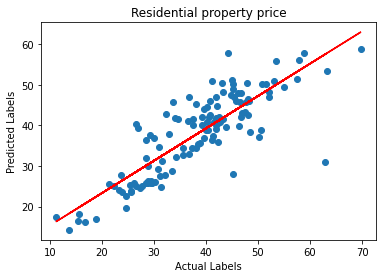

In [80]:
# use the random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor().fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE', rmse)
r2 = r2_score(y_test, predictions)
print('R2: ', r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Residential property price')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [81]:
import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'

joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
49.42
16.39
